In [ ]:
#| default_exp segmask.vis

# SegMask Visualization

> API details.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastcore.all import *
import PIL
import numpy as np
import polvo as pv
import polvo.segmask as ps
import matplotlib as mpl

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#| export
# def overlay(
#     image:PIL.Image,
#     mask:ps.SegMask,
# #     nclasses:int,
#     fill_background:bool=True,
#     cmap:mpl.colors.Colormap=mpl.colormaps['gist_ncar'],
#     alpha:float=0.5,
# ):
#     mask_arr = np.array(mask.mask)
#     if not len(mask_arr.shape) == 2: raise ValueError(f'Mask bust be 2d, but got {mask.shape}')
    
#     colored_mask = np.zeros((*mask_arr.shape, 3), dtype=np.uint8)
#     for class_idx in np.unique(mask_arr):
#         if not fill_background and mask.class_map.id2name[class_idx] == 'background': continue
#         mask_idxs = mask_arr == class_idx
#         colored_mask[mask_idxs] = np.array(cmap(class_idx/len(mask.class_map))[:3]) * 255

#     return PIL.Image.blend(image, PIL.Image.fromarray(colored_mask), alpha)

In [ ]:
#| export
def overlay_array(
    image:PIL.Image,
    mask:Union[PIL.Image.Image, np.ndarray],
    nclasses:int,
    ignore_idxs:Sequence=None,
    cmap:mpl.colors.Colormap=mpl.colormaps['gist_ncar'],
    alpha:float=0.5,
):
    mask = np.asarray(mask)
    ignore_idxs = ignore_idxs or []
    if not len(mask.shape) == 2: raise ValueError(f'Mask bust be 2d, but got {mask.shape}')
    
    colored_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for class_idx in np.unique(mask):
        if class_idx in ignore_idxs: continue
        mask_idxs = mask == class_idx
        colored_mask[mask_idxs] = np.array(cmap(class_idx/nclasses)[:3]) * 255

    return PIL.Image.blend(image, PIL.Image.fromarray(colored_mask), alpha)

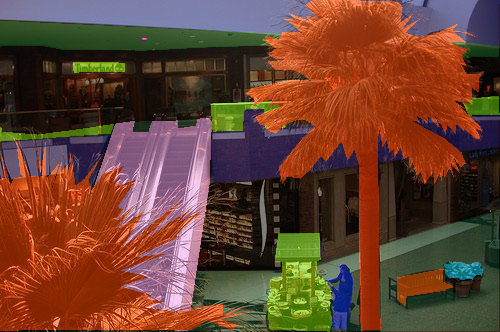

In [ ]:
image = pv.open_image(pv.test.SEG_IMAGE)
mask = pv.open_mask(pv.test.SEG_MASK)
overlay_array(image, mask, 105, ignore_idxs=[0])

In [ ]:
#| export
def overlay(
    image:PIL.Image,
    mask:ps.SegMask,
    fill_background:bool=True,
    ignore_idxs=None,
    cmap:mpl.colors.Colormap=mpl.colormaps['gist_ncar'],
    alpha:float=0.5,
):
    ignore_idxs = ignore_idxs or []
    if not fill_background: ignore_idxs.append(mask.class_map.name2id['background'])
    return overlay_array(image=image, mask=mask.mask, nclasses=len(mask.class_map), ignore_idxs=ignore_idxs, cmap=cmap, alpha=alpha)

In [ ]:
image = PIL.Image.fromarray(np.zeros((32, 32, 3), dtype=np.uint8))
mask = np.zeros((32, 32))
mask[3:21, 5:18] = 1
mask[10:16, 7:12] = 2
mask = ps.SegMask(mask, pv.ClassMap(pv.Label(0, 'background'), pv.Label(1, 'test'), pv.Label(2, 'test2')))
mask

<SegMask
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]>

<AxesSubplot:>

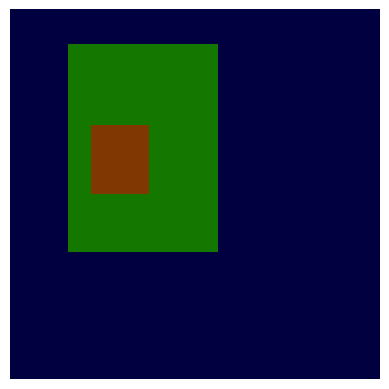

In [ ]:
result = overlay(image, mask, fill_background=True)
pv.show_image(result)

<AxesSubplot:>

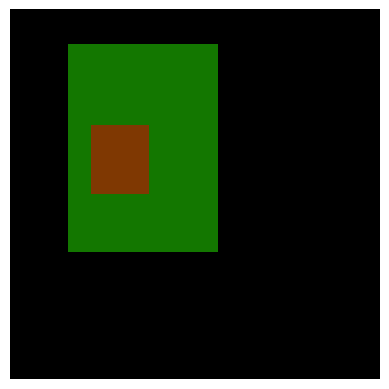

In [ ]:
result = overlay(image, mask, fill_background=False)
pv.show_image(result)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()